In [1]:
import math
import sys
sys.path.append('C:/Users/Gabzer/Desktop/Mestrado/Neural_Networks/')
from Perceptron import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Métodos para o Backpropagation
def erroTotal(results, saidas):
    result = 0
    for i in range(len(results)):
        result += 1 / 2 * (saidas[i] - results[i]) ** 2
    return result

#servem para a última camada
#derivada
def derivada(saida_desejada, funcao_ativacao1, funcao_ativacao2):
    return -(saida_desejada - funcao_ativacao1) * funcao_ativacao1 * (1 - funcao_ativacao1) * funcao_ativacao2
#valor t + 1 do peso
def novoPeso(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso

#outras camadas
def derivada2(saida_desejada, funcao_ativacao):
    return -(saida_desejada - funcao_ativacao) * funcao_ativacao * (1 - funcao_ativacao)
    
def derivada3(peso, derivada, funcao_ativacao):
    return (peso[0] * derivada[0] + peso[1] * derivada[1]) * funcao_ativacao * (1 - funcao_ativacao)

def novoPeso2(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso * saida_desejada

In [3]:
epocas = 10001
count = 0
saidas = [0.01, 0.99]     # y1 e y2
pesos = [[0.15, 0.2],     # w1 e w2
        [0.25, 0.3],      # w3 e w4
        [0.4, 0.45],      # w5 e w6
        [0.5, 0.55]]      # w7 e w8
listE_total = []
listCount = []

while count < epocas:
    
############################################################################################################################
###                                                   CAMADA 1                                                           ###
############################################################################################################################
    #Perceptron H1
    entradas = [0.05, 0.1]     # x1 e x2
    bias = 0.35                # layer1
    perceptron_h1 = Perceptron(entradas, pesos[0], bias)    
    #Perceptron H2
    entradas = [0.05, 0.1]     # x1 e x2
    bias = 0.35                # layer1
    perceptron_h2 = Perceptron(entradas, pesos[1], bias)    
    #Resultado dos Somatórios
    uh1 = perceptron_h1.somatorio()
    uh2 = perceptron_h2.somatorio()    
    #Resultado das funções de ativação
    h1 = perceptron_h1.sigmoide(uh1)
    h2 = perceptron_h2.sigmoide(uh2)    
############################################################################################################################
###                                                   CAMADA 2                                                           ###
############################################################################################################################
    #Perceptron O1
    entradas = [h1, h2]
    bias = 0.6                 # layer2
    perceptron_o1 = Perceptron(entradas, pesos[2], bias)    
    #Perceptron O2
    entradas = [h1, h2]
    bias = 0.6                 # layer2
    perceptron_o2 = Perceptron(entradas, pesos[3], bias)    
    #Resultado dos Somatórios
    uo1 = perceptron_o1.somatorio()
    uo2 = perceptron_o2.somatorio()    
    #Resultado das funções de ativação
    o1 = perceptron_o1.sigmoide(uo1)
    o2 = perceptron_o2.sigmoide(uo2)    
    ###################################################################
    #finaliza o loop se o resultado da sigmoide é = as saídas desejadas
    if o1 == saidas[0] and o2 == saidas[1]:
        print('Resolvido!')
        break
    else:
        print('Resultado:' + str(o1) + ' e ' + str(o2) + 'Uops... Reajustar')
    ###################################################################    
    results = [o1, o2]
    E_total = erroTotal(results, saidas)
    print('Erro total da rede: ' + str(E_total))    
    
####################################################### CORRIGINDO #########################################################
    ###Camada 2###
    #calcula a derivada de w5
    d_w5 = derivada(0.01, o1, h1)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w5
    w5_novo = novoPeso(perceptron_o1.pesos[0], taxa_aprendizado, d_w5)
    
    #calcula a derivada de w6
    d_w6 = derivada(0.01, o1, h2)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w6
    w6_novo = novoPeso(perceptron_o1.pesos[1], taxa_aprendizado, d_w6)
    
    #calcula a derivada de w7
    d_w7 = derivada(0.99, o2, h1)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w7
    w7_novo = novoPeso(perceptron_o2.pesos[0], taxa_aprendizado, d_w7)
    
    #calcula a derivada de w8
    d_w8 = derivada(0.99, o2, 0.05)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w8
    w8_novo = novoPeso(perceptron_o2.pesos[1], taxa_aprendizado, d_w8)
    
    
    ###Camada 1###
    #d_o1 = -(y1 - go1) * go1 * (1 - go1)
    d_o1 = -(saidas[0] - o1) * o1 * (1 - o1)
    
    #d_h1 = (w5 * d_o1 + w2 * d_o1) * gh1 * (1 - gh1)
    d_h1 = (perceptron_o1.pesos[1] * d_o1 + perceptron_h1.pesos[1] * d_o1) * h1 * (1 - h1)
    
    w1_novo = perceptron_h1.pesos[0] - d_h1 * saidas[0]
    
    #w2(t + 1) = w2(t) - d_h1 * y1
    w2_novo = perceptron_h1.pesos[1] - d_h1 * saidas[0]
    
    #d_o2 = -(y2 - go2) * go2 * (1 - go2)
    d_o2 = -(saidas[1] - o2) * o2 * (1 - o2)
    
    #d_h2 = (w6 * d_o1 + w8 * d_o2) * gh2 * (1 - gh2)
    d_h2 = (perceptron_o1.pesos[1] * d_o1 + perceptron_o2.pesos[1] * d_o2) * h2 * (1 - h2)
    
    #w3(t + 1) = w3(t) - d_h2 * y2
    w3_novo = perceptron_h2.pesos[0] - d_h2 * saidas[1]
    
    #w4(t + 1) = w4(t) - d_h2 * y2
    w4_novo = perceptron_h2.pesos[1] - d_h2 * saidas[1]
    
    
    #os pesos sinápticos reajustados são postos em seus lugares para a nova iteração
    pesos = [[w1_novo, w2_novo],     # w1 e w2
            [w3_novo, w4_novo],      # w3 e w4
            [w5_novo, w6_novo],      # w5 e w6
            [w7_novo, w8_novo]]      # w7 e w8
    
    listE_total.append(E_total)
    listCount.append(count)
    print(count)
    count += 1
    print('====================================================================')

Resultado:0.7513650695523157 e 0.7729284653214625Uops... Reajustar
Erro total da rede: 0.2983711087600027
0
Resultado:0.742061826218241 e 0.7741674862336226Uops... Reajustar
Erro total da rede: 0.29124909570234975
1
Resultado:0.7324337830322526 e 0.775393522502123Uops... Reajustar
Erro total da rede: 0.2839832555251693
2
Resultado:0.722488357021748 e 0.7766070762897396Uops... Reajustar
Erro total da rede: 0.27658809939058143
3
Resultado:0.7122360099404723 e 0.777808622131537Uops... Reajustar
Erro total da rede: 0.26908029724941596
4
Resultado:0.7016903801465391 e 0.7789986034700868Uops... Reajustar
Erro total da rede: 0.2614785856624187
5
Resultado:0.6908683473910429 e 0.7801774293425067Uops... Reajustar
Erro total da rede: 0.2538036088181643
6
Resultado:0.6797900191634729 e 0.7813454713645028Uops... Reajustar
Erro total da rede: 0.24607769104555344
7
Resultado:0.6684786298788068 e 0.7825030611609451Uops... Reajustar
Erro total da rede: 0.23832454281732454
8
Resultado:0.656960347885797

Erro total da rede: 0.028865267100245107
80
Resultado:0.19699633477819742 e 0.842110123464163Uops... Reajustar
Erro total da rede: 0.028419522401132394
81
Resultado:0.1950999955875725 e 0.8426503222139174Uops... Reajustar
Erro total da rede: 0.027986967955090848
82
Resultado:0.19324730013478933 e 0.8431854319937261Uops... Reajustar
Erro total da rede: 0.027567045192779194
83
Resultado:0.19143677645084362 e 0.8437155287769984Uops... Reajustar
Erro total da rede: 0.02715922518493329
84
Resultado:0.1896670150766747 e 0.8442406870546882Uops... Reajustar
Erro total da rede: 0.026763006808425686
85
Resultado:0.1879366660004656 e 0.8447609798654446Uops... Reajustar
Erro total da rede: 0.026377915038503515
86
Resultado:0.18624443575543806 e 0.8452764788256434Uops... Reajustar
Erro total da rede: 0.02600349935792859
87
Resultado:0.1845890846700986 e 0.8457872541592226Uops... Reajustar
Erro total da rede: 0.025639332274439753
88
Resultado:0.18296942426315782 e 0.8462933747272573Uops... Reajustar

Resultado:0.0701521414317434 e 0.9085090224357006Uops... Reajustar
Erro total da rede: 0.005129529771604801
353
Resultado:0.07002943885342716 e 0.908623656369505Uops... Reajustar
Erro total da rede: 0.005112821415862874
354
Resultado:0.06990734895389608 e 0.9087378706838555Uops... Reajustar
Erro total da rede: 0.005096212059838834
355
Resultado:0.06978586683989722 e 0.9088516678637534Uops... Reajustar
Erro total da rede: 0.005079700841146258
356
Resultado:0.06966498767159263 e 0.908965050373962Uops... Reajustar
Erro total da rede: 0.005063286907372905
357
Resultado:0.06954470666182268 e 0.909078020659216Uops... Reajustar
Erro total da rede: 0.005046969415936395
358
Resultado:0.06942501907538128 e 0.909190581144427Uops... Reajustar
Erro total da rede: 0.005030747533942435
359
Resultado:0.06930592022830318 e 0.9093027342348888Uops... Reajustar
Erro total da rede: 0.00501462043804542
360
Resultado:0.06918740548716325 e 0.9094144823164791Uops... Reajustar
Erro total da rede: 0.004998587314

601
Resultado:0.05106150379043274 e 0.9283124574986403Uops... Reajustar
Erro total da rede: 0.0027456999966943884
602
Resultado:0.05101302388073788 e 0.9283680777931438Uops... Reajustar
Erro total da rede: 0.0027402809813769757
603
Resultado:0.0509646815553495 e 0.9284235684791782Uops... Reajustar
Erro total da rede: 0.002734881026884825
604
Resultado:0.050916476184621674 e 0.9284789300483827Uops... Reajustar
Erro total da rede: 0.0027295000356792522
605
Resultado:0.05086840714287089 e 0.9285341629898219Uops... Reajustar
Erro total da rede: 0.002724137910878617
606
Resultado:0.05082047380834437 e 0.9285892677900035Uops... Reajustar
Erro total da rede: 0.0027187945562528143
607
Resultado:0.050772675563188686 e 0.9286442449328943Uops... Reajustar
Erro total da rede: 0.002713469876217853
608
Resultado:0.05072501179341881 e 0.9286990948999374Uops... Reajustar
Erro total da rede: 0.00270816377583049
609
Resultado:0.05067748188888722 e 0.9287538181700693Uops... Reajustar
Erro total da rede: 

Resultado:0.04277404540325652 e 0.9382396065546005Uops... Reajustar
Erro total da rede: 0.0018766381908586383
826
Resultado:0.04274571963135227 e 0.9382750055159019Uops... Reajustar
Erro total da rede: 0.0018738786042775523
827
Resultado:0.04271745158237641 e 0.9383103424650034Uops... Reajustar
Erro total da rede: 0.001871126167065185
828
Resultado:0.04268924106607726 e 0.938345617579277Uops... Reajustar
Erro total da rede: 0.001868380852371202
829
Resultado:0.04266108789306763 e 0.9383808310353927Uops... Reajustar
Erro total da rede: 0.0018656426334776818
830
Resultado:0.042632991874819726 e 0.9384159830093223Uops... Reajustar
Erro total da rede: 0.0018629114837982888
831
Resultado:0.04260495282366023 e 0.9384510736763426Uops... Reajustar
Erro total da rede: 0.0018601873768774825
832
Resultado:0.04257697055276538 e 0.938486103211039Uops... Reajustar
Erro total da rede: 0.001857470286389735
833
Resultado:0.042549044876155975 e 0.9385210717873093Uops... Reajustar
Erro total da rede: 0.0

Resultado:0.03666041829188061 e 0.9461175656092387Uops... Reajustar
Erro total da rede: 0.0013182229757787577
1101
Resultado:0.03664291965402853 e 0.9461408060909883Uops... Reajustar
Erro total da rede: 0.001316737029019655
1102
Resultado:0.03662544747326841 e 0.9461640154114909Uops... Reajustar
Erro total da rede: 0.0013152539989978922
1103
Resultado:0.03660800168479793 e 0.946187193639114Uops... Reajustar
Erro total da rede: 0.001313773877437352
1104
Resultado:0.036590582224033906 e 0.9462103408420165Uops... Reajustar
Erro total da rede: 0.001312296656092738
1105
Resultado:0.03657318902661147 e 0.9462334570881507Uops... Reajustar
Erro total da rede: 0.0013108223267493868
1106
Resultado:0.03655582202838297 e 0.9462565424452625Uops... Reajustar
Erro total da rede: 0.0013093508812231365
1107
Resultado:0.03653848116541726 e 0.9462795969808925Uops... Reajustar
Erro total da rede: 0.001307882311360196
1108
Resultado:0.036521166373998555 e 0.9463026207623763Uops... Reajustar
Erro total da r

Resultado:0.03294634239816904 e 0.9511402382599154Uops... Reajustar
Erro total da rede: 0.0010183078559750742
1353
Resultado:0.03293391628110235 e 0.9511573476166595Uops... Reajustar
Erro total da rede: 0.0010173580800808195
1354
Resultado:0.03292150535313655 e 0.951174438104426Uops... Reajustar
Erro total da rede: 0.001016409832080456
1355
Resultado:0.032909109584180626 e 0.9511915097573062Uops... Reajustar
Erro total da rede: 0.0010154631084286297
1356
Resultado:0.032896728944225954 e 0.951208562609306Uops... Reajustar
Erro total da rede: 0.0010145179055907443
1357
Resultado:0.032884363403346065 e 0.9512255966943457Uops... Reajustar
Erro total da rede: 0.0010135742200429697
1358
Resultado:0.032872012931696296 e 0.9512426120462617Uops... Reajustar
Erro total da rede: 0.00101263204827213
1359
Resultado:0.03285967749951357 e 0.9512596086988048Uops... Reajustar
Erro total da rede: 0.0010116913867757446
1360
Resultado:0.032847357077116064 e 0.9512765866856419Uops... Reajustar
Erro total d

1560
Resultado:0.030649684368792552 e 0.9543374425906905Uops... Reajustar
Erro total da rede: 0.0008491137327515243
1561
Resultado:0.030639873034487664 e 0.9543512526835083Uops... Reajustar
Erro total da rede: 0.0008484187720574226
1562
Resultado:0.03063007205581142 e 0.9543650494953744Uops... Reajustar
Erro total da rede: 0.0008477247852475443
1563
Resultado:0.030620281415050337 e 0.9543788330472258Uops... Reajustar
Erro total da rede: 0.0008470317703566406
1564
Resultado:0.030610501094532904 e 0.9543926033599544Uops... Reajustar
Erro total da rede: 0.0008463397254246379
1565
Resultado:0.030600731076629365 e 0.9544063604544055Uops... Reajustar
Erro total da rede: 0.0008456486484966547
1566
Resultado:0.03059097134375167 e 0.9544201043513797Uops... Reajustar
Erro total da rede: 0.000844958537622956
1567
Resultado:0.030581221878353236 e 0.9544338350716317Uops... Reajustar
Erro total da rede: 0.0008442693908589499
1568
Resultado:0.03057148266292898 e 0.954447552635871Uops... Reajustar
Err

Erro total da rede: 0.0006779339682010982
1859
Resultado:0.02811093729196842 e 0.9579544866532068Uops... Reajustar
Erro total da rede: 0.000677460487626556
1860
Resultado:0.02810358407839772 e 0.9579650912440528Uops... Reajustar
Erro total da rede: 0.0006769875677427379
1861
Resultado:0.028096237353879068 e 0.9579756872232426Uops... Reajustar
Erro total da rede: 0.0006765152075957588
1862
Resultado:0.028088897109137482 e 0.9579862746022464Uops... Reajustar
Erro total da rede: 0.0006760434062338682
1863
Resultado:0.028081563334916296 e 0.9579968533925136Uops... Reajustar
Erro total da rede: 0.0006755721627074281
1864
Resultado:0.028074236021977138 e 0.9580074236054726Uops... Reajustar
Erro total da rede: 0.0006751014760689023
1865
Resultado:0.02806691516109996 e 0.9580179852525299Uops... Reajustar
Erro total da rede: 0.000674631345372889
1866
Resultado:0.0280596007430829 e 0.9580285383450718Uops... Reajustar
Erro total da rede: 0.0006741617696760507
1867
Resultado:0.0280522927587422 e 0

Resultado:0.026592142054381065 e 0.9601608300341506Uops... Reajustar
Erro total da rede: 0.0005828376211018031
2087
Resultado:0.026586054856557195 e 0.9601697379720876Uops... Reajustar
Erro total da rede: 0.0005824708741793182
2088
Resultado:0.026579972437110064 e 0.9601786394408626Uops... Reajustar
Erro total da rede: 0.0005821045158067032
2089
Resultado:0.026573894789968636 e 0.9601875344481829Uops... Reajustar
Erro total da rede: 0.0005817385453936138
2090
Resultado:0.026567821909072597 e 0.9601964230017437Uops... Reajustar
Erro total da rede: 0.0005813729623508693
2091
Resultado:0.02656175378837221 e 0.9602053051092271Uops... Reajustar
Erro total da rede: 0.0005810077660904553
2092
Resultado:0.026555690421828388 e 0.9602141807783023Uops... Reajustar
Erro total da rede: 0.0005806429560255368
2093
Resultado:0.026549631803412674 e 0.9602230500166267Uops... Reajustar
Erro total da rede: 0.0005802785315704224
2094
Resultado:0.026543577927107175 e 0.9602319128318437Uops... Reajustar
Erro

Resultado:0.025179725228258506 e 0.9622419160800334Uops... Reajustar
Erro total da rede: 0.0005004676404566678
2342
Resultado:0.02517468544799384 e 0.9622493932567013Uops... Reajustar
Erro total da rede: 0.0005001836265333844
2343
Resultado:0.0251696491880682 e 0.9622568655797965Uops... Reajustar
Erro total da rede: 0.0004998998819732688
2344
Resultado:0.02516461644450564 e 0.9622643330544886Uops... Reajustar
Erro total da rede: 0.0004996164064106534
2345
Resultado:0.02515958721333644 e 0.9622717956859391Uops... Reajustar
Erro total da rede: 0.0004993331994805287
2346
Resultado:0.025154561490597128 e 0.9622792534793024Uops... Reajustar
Erro total da rede: 0.0004990502608185276
2347
Resultado:0.02514953927233038 e 0.9622867064397247Uops... Reajustar
Erro total da rede: 0.0004987675900609384
2348
Resultado:0.025144520554585086 e 0.9622941545723449Uops... Reajustar
Erro total da rede: 0.0004984851868446832
2349
Resultado:0.025139505333416235 e 0.9623015978822943Uops... Reajustar
Erro tota

Resultado:0.02396049566147604 e 0.9640616884149728Uops... Reajustar
Erro total da rede: 0.0004338457234980248
2606
Resultado:0.02395626389884314 e 0.9640680430633334Uops... Reajustar
Erro total da rede: 0.00043362184628964196
2607
Resultado:0.023952034790359178 e 0.9640743939952908Uops... Reajustar
Erro total da rede: 0.00043339816075140246
2608
Resultado:0.02394780833333589 e 0.9640807412144117Uops... Reajustar
Erro total da rede: 0.00043317466664888565
2609
Resultado:0.023943584525088723 e 0.9640870847242571Uops... Reajustar
Erro total da rede: 0.00043295136374806194
2610
Resultado:0.02393936336293698 e 0.9640934245283838Uops... Reajustar
Erro total da rede: 0.00043272825181526884
2611
Resultado:0.023935144844203685 e 0.9640997606303437Uops... Reajustar
Erro total da rede: 0.00043250533061721386
2612
Resultado:0.023930928966215598 e 0.964106093033684Uops... Reajustar
Erro total da rede: 0.00043228259992098635
2613
Resultado:0.02392671572630324 e 0.9641124217419472Uops... Reajustar
Er

2861
Resultado:0.022956971567362195 e 0.96557626426889Uops... Reajustar
Erro total da rede: 0.000382200989630266
2862
Resultado:0.022953340882352617 e 0.9655817720526612Uops... Reajustar
Erro total da rede: 0.00038201944805131343
2863
Resultado:0.0229497122700219 e 0.9655872768974765Uops... Reajustar
Erro total da rede: 0.0003818380485784206
2864
Resultado:0.022946085728461785 e 0.9655927788059089Uops... Reajustar
Erro total da rede: 0.0003816567910529861
2865
Resultado:0.022942461255766457 e 0.9655982777805278Uops... Reajustar
Erro total da rede: 0.00038147567531665035
2866
Resultado:0.022938838850032565 e 0.9656037738239001Uops... Reajustar
Erro total da rede: 0.00038129470121126783
2867
Resultado:0.02293521850935915 e 0.965609266938589Uops... Reajustar
Erro total da rede: 0.00038111386857893857
2868
Resultado:0.0229316002318477 e 0.9656147571271548Uops... Reajustar
Erro total da rede: 0.00038093317726198457
2869
Resultado:0.02292798401560207 e 0.965620244392155Uops... Reajustar
Erro

Resultado:0.022109260658792023 e 0.9668678927841406Uops... Reajustar
Erro total da rede: 0.00034086428897429005
3112
Resultado:0.022106094439365634 e 0.9668727385570407Uops... Reajustar
Erro total da rede: 0.0003407138722129155
3113
Resultado:0.02210292988224479 e 0.9668775819479215Uops... Reajustar
Erro total da rede: 0.0003405635641548095
3114
Resultado:0.022099766986024026 e 0.9668824229587037Uops... Reajustar
Erro total da rede: 0.0003404133646881721
3115
Resultado:0.02209660574929958 e 0.9668872615913059Uops... Reajustar
Erro total da rede: 0.00034026327370135557
3116
Resultado:0.022093446170669273 e 0.9668920978476446Uops... Reajustar
Erro total da rede: 0.0003401132910828525
3117
Resultado:0.022090288248732614 e 0.9668969317296339Uops... Reajustar
Erro total da rede: 0.0003399634167213199
3118
Resultado:0.022087131982090724 e 0.9669017632391855Uops... Reajustar
Erro total da rede: 0.00033981365050556045
3119
Resultado:0.02208397736934638 e 0.96690659237821Uops... Reajustar
Erro 

Resultado:0.021368864450134254 e 0.9680055108983444Uops... Reajustar
Erro total da rede: 0.00030650431486418624
3361
Resultado:0.021366072583113252 e 0.9680098178196587Uops... Reajustar
Erro total da rede: 0.0003063778591445999
3362
Resultado:0.02136328207365878 e 0.9680141227777761Uops... Reajustar
Erro total da rede: 0.0003062514883581192
3363
Resultado:0.021360492920709413 e 0.9680184257741639Uops... Reajustar
Erro total da rede: 0.000306125202423716
3364
Resultado:0.021357705123204875 e 0.9680227268102886Uops... Reajustar
Erro total da rede: 0.00030599900126044156
3365
Resultado:0.021354918680086012 e 0.9680270258876141Uops... Reajustar
Erro total da rede: 0.0003058728847874726
3366
Resultado:0.02135213359029484 e 0.9680313230076038Uops... Reajustar
Erro total da rede: 0.00030574685292407015
3367
Resultado:0.021349349852774546 e 0.968035618171719Uops... Reajustar
Erro total da rede: 0.0003056209055895966
3368
Resultado:0.02134656746646945 e 0.9680399113814196Uops... Reajustar
Erro 

Resultado:0.020725512380494207 e 0.9690015015539599Uops... Reajustar
Erro total da rede: 0.00027798677640624087
3605
Resultado:0.02072302283110611 e 0.9690053695830005Uops... Reajustar
Erro total da rede: 0.0002778788624914107
3606
Resultado:0.02072053441094062 e 0.9690092359660957Uops... Reajustar
Erro total da rede: 0.00027777101639160656
3607
Resultado:0.0207180471191755 e 0.9690131007043937Uops... Reajustar
Erro total da rede: 0.0002776632380463925
3608
Resultado:0.020715560954989307 e 0.969016963799042Uops... Reajustar
Erro total da rede: 0.0002775555273954023
3609
Resultado:0.02071307591756144 e 0.969020825251186Uops... Reajustar
Erro total da rede: 0.00027744788437835375
3610
Resultado:0.02071059200607212 e 0.9690246850619713Uops... Reajustar
Erro total da rede: 0.00027734030893501364
3611
Resultado:0.020708109219702408 e 0.9690285432325413Uops... Reajustar
Erro total da rede: 0.00027723280100523266
3612
Resultado:0.020705627557634186 e 0.9690323997640389Uops... Reajustar
Erro t

Resultado:0.020145213332796945 e 0.969906093971192Uops... Reajustar
Erro total da rede: 0.0002533452065312638
3851
Resultado:0.020142978679439365 e 0.969909589160982Uops... Reajustar
Erro total da rede: 0.0002532523120860461
3852
Resultado:0.020140744975644588 e 0.9699130829568181Uops... Reajustar
Erro total da rede: 0.0002531594724803659
3853
Resultado:0.020138512220765934 e 0.9699165753596116Uops... Reajustar
Erro total da rede: 0.00025306668766838944
3854
Resultado:0.020136280414157368 e 0.9699200663702724Uops... Reajustar
Erro total da rede: 0.0002529739576043478
3855
Resultado:0.020134049555173457 e 0.9699235559897106Uops... Reajustar
Erro total da rede: 0.00025288128224249835
3856
Resultado:0.020131819643169374 e 0.9699270442188344Uops... Reajustar
Erro total da rede: 0.0002527886615371718
3857
Resultado:0.02012959067750088 e 0.9699305310585518Uops... Reajustar
Erro total da rede: 0.00025269609544273396
3858
Resultado:0.02012736265752438 e 0.9699340165097701Uops... Reajustar
Erro

Resultado:0.019606473960131713 e 0.9707514096105655Uops... Reajustar
Erro total da rede: 0.00023139628696345932
4105
Resultado:0.019604461249387934 e 0.9707545779280519Uops... Reajustar
Erro total da rede: 0.00023131597330921128
4106
Resultado:0.01960244934175091 e 0.9707577450587775Uops... Reajustar
Erro total da rede: 0.00023123570429194607
4107
Resultado:0.01960043823670799 e 0.9707609110034711Uops... Reajustar
Erro total da rede: 0.0002311554798766027
4108
Resultado:0.019598427933747 e 0.97076407576286Uops... Reajustar
Erro total da rede: 0.00023107530002816328
4109
Resultado:0.01959641843235619 e 0.9707672393376712Uops... Reajustar
Erro total da rede: 0.00023099516471164423
4110
Resultado:0.019594409732024292 e 0.9707704017286313Uops... Reajustar
Erro total da rede: 0.00023091507389209464
4111
Resultado:0.019592401832240487 e 0.970773562936466Uops... Reajustar
Erro total da rede: 0.0002308350275346022
4112
Resultado:0.019590394732494375 e 0.9707767229619007Uops... Reajustar
Erro t

4350
Resultado:0.019134356307010974 e 0.9714967497495572Uops... Reajustar
Erro total da rede: 0.0002129033674869704
4351
Resultado:0.019132526752304223 e 0.9714996466415851Uops... Reajustar
Erro total da rede: 0.00021283305963388352
4352
Resultado:0.019130697887104305 e 0.9715025425088086Uops... Reajustar
Erro total da rede: 0.0002127627887720012
4353
Resultado:0.019128869710996314 e 0.9715054373518218Uops... Reajustar
Erro total da rede: 0.0002126925548738665
4354
Resultado:0.019127042223565607 e 0.9715083311712177Uops... Reajustar
Erro total da rede: 0.00021262235791205385
4355
Resultado:0.019125215424397976 e 0.9715112239675892Uops... Reajustar
Erro total da rede: 0.00021255219785916007
4356
Resultado:0.019123389313079518 e 0.9715141157415284Uops... Reajustar
Erro total da rede: 0.0002124820746878116
4357
Resultado:0.01912156388919664 e 0.9715170064936274Uops... Reajustar
Erro total da rede: 0.00021241198837065417
4358
Resultado:0.019119739152336182 e 0.9715198962244773Uops... Reaju

4601
Resultado:0.01869574389045056 e 0.9721931890203349Uops... Reajustar
Erro total da rede: 0.00019634923953691451
4602
Resultado:0.018694075228637655 e 0.9721958461431978Uops... Reajustar
Erro total da rede: 0.00019628741931894828
4603
Resultado:0.018692407162152692 e 0.9721985023764549Uops... Reajustar
Erro total da rede: 0.0001962256299568627
4604
Resultado:0.01869073969065712 e 0.9722011577205941Uops... Reajustar
Erro total da rede: 0.00019616387142896446
4605
Resultado:0.018689072813812775 e 0.9722038121761021Uops... Reajustar
Erro total da rede: 0.00019610214371359628
4606
Resultado:0.018687406531281626 e 0.972206465743466Uops... Reajustar
Erro total da rede: 0.0001960404467891011
4607
Resultado:0.01868574084272599 e 0.9722091184231724Uops... Reajustar
Erro total da rede: 0.00019597878063385142
4608
Resultado:0.018684075747808445 e 0.9722117702157073Uops... Reajustar
Erro total da rede: 0.0001959171452262369
4609
Resultado:0.018682411246191796 e 0.9722144211215562Uops... Reajust

Erro total da rede: 0.00018174701878172895
4853
Resultado:0.018293218523177637 e 0.9728358761136783Uops... Reajustar
Erro total da rede: 0.00018169231112908816
4854
Resultado:0.01829168984013501 e 0.9728383235519376Uops... Reajustar
Erro total da rede: 0.00018163762945648952
4855
Resultado:0.018290161674897644 e 0.9728407702125873Uops... Reajustar
Erro total da rede: 0.0001815829737465863
4856
Resultado:0.01828863402718654 e 0.9728432160960316Uops... Reajustar
Erro total da rede: 0.00018152834398205104
4857
Resultado:0.018287106896722954 e 0.9728456612026747Uops... Reajustar
Erro total da rede: 0.00018147374014556672
4858
Resultado:0.018285580283228315 e 0.97284810553292Uops... Reajustar
Erro total da rede: 0.00018141916221983543
4859
Resultado:0.018284054186424276 e 0.9728505490871714Uops... Reajustar
Erro total da rede: 0.00018136461018756567
4860
Resultado:0.01828252860603268 e 0.9728529918658314Uops... Reajustar
Erro total da rede: 0.00018131008403149664
4861
Resultado:0.0182810035

5089
Resultado:0.01794622979384076 e 0.9733927475098383Uops... Reajustar
Erro total da rede: 0.0001694717016042524
5090
Resultado:0.017944816003695963 e 0.973395022042409Uops... Reajustar
Erro total da rede: 0.00016942269715233276
5091
Resultado:0.017943402670892523 e 0.9733972958852156Uops... Reajustar
Erro total da rede: 0.0001693737149575102
5092
Resultado:0.017941989795195568 e 0.9733995690386004Uops... Reajustar
Erro total da rede: 0.00016932475500559292
5093
Resultado:0.017940577376370368 e 0.9734018415029051Uops... Reajustar
Erro total da rede: 0.0001692758172824042
5094
Resultado:0.01793916541418246 e 0.9734041132784715Uops... Reajustar
Erro total da rede: 0.00016922690177377766
5095
Resultado:0.01793775390839742 e 0.9734063843656406Uops... Reajustar
Erro total da rede: 0.00016917800846556676
5096
Resultado:0.017936342858781127 e 0.9734086547647542Uops... Reajustar
Erro total da rede: 0.00016912913734361897
5097
Resultado:0.017934932265099467 e 0.973410924476153Uops... Reajusta

Erro total da rede: 0.00015761577347727946
5346
Resultado:0.017597302090959006 e 0.9739555283880776Uops... Reajustar
Erro total da rede: 0.00015757203418353613
5347
Resultado:0.017595998553363548 e 0.9739576362804214Uops... Reajustar
Erro total da rede: 0.00015752831386697588
5348
Resultado:0.01759469541785164 e 0.973959743563702Uops... Reajustar
Erro total da rede: 0.0001574846125160685
5349
Resultado:0.017593392684226775 e 0.9739618502382074Uops... Reajustar
Erro total da rede: 0.00015744093011927886
5350
Resultado:0.017592090352292686 e 0.9739639563042247Uops... Reajustar
Erro total da rede: 0.00015739726666509475
5351
Resultado:0.017590788421853118 e 0.9739660617620417Uops... Reajustar
Erro total da rede: 0.00015735362214200016
5352
Resultado:0.017589486892712013 e 0.9739681666119454Uops... Reajustar
Erro total da rede: 0.00015730999653849458
5353
Resultado:0.01758818576467345 e 0.9739702708542226Uops... Reajustar
Erro total da rede: 0.00015726638984308884
5354
Resultado:0.01758688

5592
Resultado:0.017288286099012326 e 0.9744563938618863Uops... Reajustar
Erro total da rede: 0.00014736140301893072
5593
Resultado:0.01728707586310962 e 0.9744583601533476Uops... Reajustar
Erro total da rede: 0.00014732202187888355
5594
Resultado:0.017285865984702775 e 0.9744603259011854Uops... Reajustar
Erro total da rede: 0.00014728265712220956
5595
Resultado:0.017284656463624898 e 0.974462291105645Uops... Reajustar
Erro total da rede: 0.0001472433087393755
5596
Resultado:0.017283447299709112 e 0.9744642557669718Uops... Reajustar
Erro total da rede: 0.000147203976720854
5597
Resultado:0.017282238492788694 e 0.9744662198854114Uops... Reajustar
Erro total da rede: 0.000147164661057121
5598
Resultado:0.017281030042697102 e 0.9744681834612084Uops... Reajustar
Erro total da rede: 0.00014712536173866814
5599
Resultado:0.017279821949267738 e 0.9744701464946084Uops... Reajustar
Erro total da rede: 0.00014708607875598204
5600
Resultado:0.01727861421233428 e 0.9744721089858556Uops... Reajusta

Erro total da rede: 0.00013782492833463433
5848
Resultado:0.01698969116774205 e 0.9749426733181118Uops... Reajustar
Erro total da rede: 0.00013778943471275668
5849
Resultado:0.016988567285640323 e 0.974944508051498Uops... Reajustar
Erro total da rede: 0.00013775395525866498
5850
Resultado:0.016987443721592485 e 0.9749463422994109Uops... Reajustar
Erro total da rede: 0.00013771848996446364
5851
Resultado:0.016986320475456583 e 0.9749481760620604Uops... Reajustar
Erro total da rede: 0.0001376830388222574
5852
Resultado:0.016985197547090724 e 0.9749500093396558Uops... Reajustar
Erro total da rede: 0.0001376476018241647
5853
Resultado:0.0169840749363531 e 0.9749518421324072Uops... Reajustar
Erro total da rede: 0.0001376121789622959
5854
Resultado:0.016982952643102022 e 0.9749536744405235Uops... Reajustar
Erro total da rede: 0.00013757677022878053
5855
Resultado:0.016981830667195854 e 0.9749555062642141Uops... Reajustar
Erro total da rede: 0.00013754137561574836
5856
Resultado:0.01698070900

6090
Resultado:0.016726667067785254 e 0.9753729943384757Uops... Reajustar
Erro total da rede: 0.0001295986722315454
6091
Resultado:0.01672561621035754 e 0.9753747174233295Uops... Reajustar
Erro total da rede: 0.00012956640192824298
6092
Resultado:0.016724565639034607 e 0.9753764400700115Uops... Reajustar
Erro total da rede: 0.00012953414402982566
6093
Resultado:0.01672351535369381 e 0.9753781622787037Uops... Reajustar
Erro total da rede: 0.0001295018985296403
6094
Resultado:0.016722465354212693 e 0.9753798840495875Uops... Reajustar
Erro total da rede: 0.0001294696654210474
6095
Resultado:0.016721415640468765 e 0.9753816053828452Uops... Reajustar
Erro total da rede: 0.00012943744469739858
6096
Resultado:0.016720366212339608 e 0.975383326278658Uops... Reajustar
Erro total da rede: 0.00012940523635206295
6097
Resultado:0.01671931706970299 e 0.9753850467372073Uops... Reajustar
Erro total da rede: 0.00012937304037840874
6098
Resultado:0.0167182682124366 e 0.9753867667586745Uops... Reajustar

Resultado:0.016467641155569857 e 0.9757986700668627Uops... Reajustar
Erro total da rede: 0.00012175407699352087
6346
Resultado:0.01646665947418172 e 0.9758002870336172Uops... Reajustar
Erro total da rede: 0.00012172476654134177
6347
Resultado:0.016465678049850087 e 0.9758019036053744Uops... Reajustar
Erro total da rede: 0.00012169546693769609
6348
Resultado:0.016464696882469255 e 0.975803519782292Uops... Reajustar
Erro total da rede: 0.00012166617817699156
6349
Resultado:0.016463715971933607 e 0.9758051355645272Uops... Reajustar
Erro total da rede: 0.00012163690025364005
6350
Resultado:0.016462735318137512 e 0.9758067509522372Uops... Reajustar
Erro total da rede: 0.00012160763316206019
6351
Resultado:0.016461754920975503 e 0.9758083659455792Uops... Reajustar
Erro total da rede: 0.00012157837689667378
6352
Resultado:0.016460774780342094 e 0.9758099805447102Uops... Reajustar
Erro total da rede: 0.000121549131451903
6353
Resultado:0.016459794896131898 e 0.9758115947497871Uops... Reajustar

Resultado:0.016230879756069176 e 0.9761894858139368Uops... Reajustar
Erro total da rede: 0.00011477708230902224
6595
Resultado:0.016229958964681865 e 0.976191009073829Uops... Reajustar
Erro total da rede: 0.00011475030955034563
6596
Resultado:0.01622903840578532 e 0.9761925319753715Uops... Reajustar
Erro total da rede: 0.00011472354635594362
6597
Resultado:0.016228118079287576 e 0.9761940545187022Uops... Reajustar
Erro total da rede: 0.00011469679272105747
6598
Resultado:0.01622719798509671 e 0.9761955767039582Uops... Reajustar
Erro total da rede: 0.00011467004864094721
6599
Resultado:0.016226278123120837 e 0.976197098531277Uops... Reajustar
Erro total da rede: 0.00011464331411086412
6600
Resultado:0.01622535849326816 e 0.9761986200007957Uops... Reajustar
Erro total da rede: 0.00011461658912607094
6601
Resultado:0.016224439095446942 e 0.9762001411126517Uops... Reajustar
Erro total da rede: 0.00011458987368182639
6602
Resultado:0.0162235199295654 e 0.9762016618669818Uops... Reajustar
Er

Resultado:0.01600336436215477 e 0.9765666751177718Uops... Reajustar
Erro total da rede: 0.00010824730052813991
6850
Resultado:0.01600250000929789 e 0.9765681112576142Uops... Reajustar
Erro total da rede: 0.00010822282077472535
6851
Resultado:0.016001635867020064 e 0.9765695470719091Uops... Reajustar
Erro total da rede: 0.00010819834946698304
6852
Resultado:0.016000771935241142 e 0.9765709825607772Uops... Reajustar
Erro total da rede: 0.00010817388660086332
6853
Resultado:0.015999908213880944 e 0.9765724177243382Uops... Reajustar
Erro total da rede: 0.000108149432172331
6854
Resultado:0.015999044702859424 e 0.9765738525627126Uops... Reajustar
Erro total da rede: 0.00010812498617734275
6855
Resultado:0.015998181402096457 e 0.9765752870760203Uops... Reajustar
Erro total da rede: 0.00010810054861186211
6856
Resultado:0.01599731831151207 e 0.9765767212643811Uops... Reajustar
Erro total da rede: 0.00010807611947185803
6857
Resultado:0.015996455431026284 e 0.9765781551279153Uops... Reajustar


7103
Resultado:0.01579037535861629 e 0.9769213088832535Uops... Reajustar
Erro total da rede: 0.00010229030406046768
7104
Resultado:0.015789562025877713 e 0.9769226660374392Uops... Reajustar
Erro total da rede: 0.00010226784600991614
7105
Resultado:0.015788748884636435 e 0.9769240228947377Uops... Reajustar
Erro total da rede: 0.00010224539545336189
7106
Resultado:0.015787935934822157 e 0.9769253794552547Uops... Reajustar
Erro total da rede: 0.00010222295238734058
7107
Resultado:0.01578712317636459 e 0.9769267357190964Uops... Reajustar
Erro total da rede: 0.00010220051680838313
7108
Resultado:0.015786310609193516 e 0.9769280916863678Uops... Reajustar
Erro total da rede: 0.00010217808871303526
7109
Resultado:0.015785498233238753 e 0.9769294473571748Uops... Reajustar
Erro total da rede: 0.00010215566809783671
7110
Resultado:0.01578468604843013 e 0.976930802731623Uops... Reajustar
Erro total da rede: 0.00010213325495932705
7111
Resultado:0.015783874054697503 e 0.9769321578098179Uops... Reaj

Resultado:0.015592059582056804 e 0.9772529069577892Uops... Reajustar
Erro total da rede: 9.687975569802588e-05
7355
Resultado:0.01559129219884142 e 0.977254192780187Uops... Reajustar
Erro total da rede: 9.685907506873105e-05
7356
Resultado:0.015590524990540904 e 0.977255478330681Uops... Reajustar
Erro total da rede: 9.683840112480123e-05
7357
Resultado:0.015589757957093203 e 0.9772567636093649Uops... Reajustar
Erro total da rede: 9.681773386324707e-05
7358
Resultado:0.015588991098436346 e 0.977258048616332Uops... Reajustar
Erro total da rede: 9.679707328107927e-05
7359
Resultado:0.015588224414508366 e 0.9772593333516759Uops... Reajustar
Erro total da rede: 9.677641937531237e-05
7360
Resultado:0.015587457905247362 e 0.9772606178154901Uops... Reajustar
Erro total da rede: 9.67557721429594e-05
7361
Resultado:0.015586691570591405 e 0.9772619020078681Uops... Reajustar
Erro total da rede: 9.673513158103566e-05
7362
Resultado:0.015585925410478648 e 0.9772631859289029Uops... Reajustar
Erro tot

Erro total da rede: 9.250527708195056e-05
7574
Resultado:0.015427343224517626 e 0.9775293973844803Uops... Reajustar
Erro total da rede: 9.248599203546194e-05
7575
Resultado:0.01542661288010756 e 0.9775306255663434Uops... Reajustar
Erro total da rede: 9.246671305863891e-05
7576
Resultado:0.015425882697669757 e 0.9775318534958559Uops... Reajustar
Erro total da rede: 9.244744014883606e-05
7577
Resultado:0.015425152677148458 e 0.9775330811731017Uops... Reajustar
Erro total da rede: 9.242817330342145e-05
7578
Resultado:0.015424422818487955 e 0.9775343085981654Uops... Reajustar
Erro total da rede: 9.240891251975321e-05
7579
Resultado:0.015423693121632538 e 0.9775355357711311Uops... Reajustar
Erro total da rede: 9.238965779519864e-05
7580
Resultado:0.015422963586526506 e 0.977536762692083Uops... Reajustar
Erro total da rede: 9.237040912712313e-05
7581
Resultado:0.01542223421311423 e 0.9775379893611055Uops... Reajustar
Erro total da rede: 9.235116651289329e-05
7582
Resultado:0.0154215050013400

Resultado:0.01523723449840571 e 0.9778497810699038Uops... Reajustar
Erro total da rede: 8.752822262027896e-05
7843
Resultado:0.015236545648707099 e 0.9778509445194676Uops... Reajustar
Erro total da rede: 8.751047970002326e-05
7844
Resultado:0.01523585694693953 e 0.9778521077379504Uops... Reajustar
Erro total da rede: 8.74927421895897e-05
7845
Resultado:0.015235168393053793 e 0.9778532707254264Uops... Reajustar
Erro total da rede: 8.747501008670648e-05
7846
Resultado:0.01523447998700077 e 0.9778544334819702Uops... Reajustar
Erro total da rede: 8.745728338909882e-05
7847
Resultado:0.015233791728731278 e 0.9778555960076566Uops... Reajustar
Erro total da rede: 8.743956209449114e-05
7848
Resultado:0.015233103618196216 e 0.9778567583025598Uops... Reajustar
Erro total da rede: 8.742184620061419e-05
7849
Resultado:0.015232415655346518 e 0.9778579203667543Uops... Reajustar
Erro total da rede: 8.740413570519707e-05
7850
Resultado:0.015231727840133104 e 0.977859082200315Uops... Reajustar
Erro tot

Erro total da rede: 8.309084452061359e-05
8103
Resultado:0.015062324112473015 e 0.978145813208194Uops... Reajustar
Erro total da rede: 8.307443495737609e-05
8104
Resultado:0.015061672267930587 e 0.9781469187822247Uops... Reajustar
Erro total da rede: 8.30580302515574e-05
8105
Resultado:0.015061020559213508 e 0.9781480241435622Uops... Reajustar
Erro total da rede: 8.304163040118345e-05
8106
Resultado:0.015060368986278046 e 0.9781491292922734Uops... Reajustar
Erro total da rede: 8.302523540426868e-05
8107
Resultado:0.015059717549080535 e 0.9781502342284248Uops... Reajustar
Erro total da rede: 8.300884525883377e-05
8108
Resultado:0.015059066247577307 e 0.9781513389520828Uops... Reajustar
Erro total da rede: 8.299245996290256e-05
8109
Resultado:0.015058415081724714 e 0.9781524434633136Uops... Reajustar
Erro total da rede: 8.297607951449968e-05
8110
Resultado:0.015057764051479162 e 0.9781535477621837Uops... Reajustar
Erro total da rede: 8.295970391164921e-05
8111
Resultado:0.015057113156797

8351
Resultado:0.014904719881631051 e 0.9784136438205042Uops... Reajustar
Erro total da rede: 7.914996331770338e-05
8352
Resultado:0.014904100430512825 e 0.9784146986123256Uops... Reajustar
Erro total da rede: 7.91347046379037e-05
8353
Resultado:0.014903481104951263 e 0.9784157532070918Uops... Reajustar
Erro total da rede: 7.911945035280839e-05
8354
Resultado:0.014902861904907146 e 0.9784168076048626Uops... Reajustar
Erro total da rede: 7.910420046067916e-05
8355
Resultado:0.014902242830341316 e 0.9784178618056976Uops... Reajustar
Erro total da rede: 7.908895495977597e-05
8356
Resultado:0.0149016238812146 e 0.9784189158096567Uops... Reajustar
Erro total da rede: 7.907371384835659e-05
8357
Resultado:0.014901005057487855 e 0.9784199696167994Uops... Reajustar
Erro total da rede: 7.905847712468467e-05
8358
Resultado:0.014900386359121928 e 0.9784210232271855Uops... Reajustar
Erro total da rede: 7.904324478702295e-05
8359
Resultado:0.014899767786077765 e 0.9784220766408745Uops... Reajustar
E

Erro total da rede: 7.545352348049884e-05
8603
Resultado:0.014752488452281946 e 0.9786733727681501Uops... Reajustar
Erro total da rede: 7.543931546917793e-05
8604
Resultado:0.014751899444901975 e 0.9786743797278221Uops... Reajustar
Erro total da rede: 7.542511144201304e-05
8605
Resultado:0.01475131055371249 e 0.9786753865047358Uops... Reajustar
Erro total da rede: 7.541091139746925e-05
8606
Resultado:0.01475072177867831 e 0.9786763930989454Uops... Reajustar
Erro total da rede: 7.539671533400996e-05
8607
Resultado:0.014750133119764235 e 0.9786773995105044Uops... Reajustar
Erro total da rede: 7.538252325010385e-05
8608
Resultado:0.014749544576935043 e 0.9786784057394663Uops... Reajustar
Erro total da rede: 7.53683351442213e-05
8609
Resultado:0.014748956150155628 e 0.9786794117858851Uops... Reajustar
Erro total da rede: 7.53541510148286e-05
8610
Resultado:0.014748367839390784 e 0.9786804176498148Uops... Reajustar
Erro total da rede: 7.533997086039196e-05
8611
Resultado:0.01474777964460540

Erro total da rede: 7.211460264339204e-05
8846
Resultado:0.014612694874475987 e 0.9789128143887975Uops... Reajustar
Erro total da rede: 7.210131939113614e-05
8847
Resultado:0.014612133099808315 e 0.9789137784699877Uops... Reajustar
Erro total da rede: 7.208803977142746e-05
8848
Resultado:0.014611571433190446 e 0.9789147423808741Uops... Reajustar
Erro total da rede: 7.207476378290385e-05
8849
Resultado:0.014611009874590528 e 0.9789157061215052Uops... Reajustar
Erro total da rede: 7.20614914242037e-05
8850
Resultado:0.014610448423976727 e 0.9789166696919301Uops... Reajustar
Erro total da rede: 7.20482226939646e-05
8851
Resultado:0.01460988708131722 e 0.9789176330921975Uops... Reajustar
Erro total da rede: 7.203495759082578e-05
8852
Resultado:0.014609325846580205 e 0.9789185963223558Uops... Reajustar
Erro total da rede: 7.202169611342945e-05
8853
Resultado:0.014608764719733918 e 0.978919559382454Uops... Reajustar
Erro total da rede: 7.200843826041343e-05
8854
Resultado:0.01460820370074651

Resultado:0.014474998603005185 e 0.9791495794398736Uops... Reajustar
Erro total da rede: 6.887861941425621e-05
9098
Resultado:0.014474462982354745 e 0.9791505022560505Uops... Reajustar
Erro total da rede: 6.88662101382141e-05
9099
Resultado:0.014473927462150557 e 0.9791514249135806Uops... Reajustar
Erro total da rede: 6.885380417113169e-05
9100
Resultado:0.014473392042363836 e 0.9791523474125087Uops... Reajustar
Erro total da rede: 6.88414015117956e-05
9101
Resultado:0.01447285672296582 e 0.9791532697528788Uops... Reajustar
Erro total da rede: 6.882900215899766e-05
9102
Resultado:0.014472321503927719 e 0.9791541919347349Uops... Reajustar
Erro total da rede: 6.881660611153232e-05
9103
Resultado:0.014471786385220784 e 0.9791551139581214Uops... Reajustar
Erro total da rede: 6.880421336818973e-05
9104
Resultado:0.014471251366816257 e 0.9791560358230821Uops... Reajustar
Erro total da rede: 6.879182392776756e-05
9105
Resultado:0.014470716448685415 e 0.9791569575296615Uops... Reajustar
Erro t

Erro total da rede: 6.584142375841781e-05
9351
Resultado:0.014342102570946499 e 0.9793789937189772Uops... Reajustar
Erro total da rede: 6.582981457907303e-05
9352
Resultado:0.014341591568366167 e 0.9793798776139923Uops... Reajustar
Erro total da rede: 6.581820842014541e-05
9353
Resultado:0.014341080659270372 e 0.9793807613610568Uops... Reajustar
Erro total da rede: 6.580660528055783e-05
9354
Resultado:0.014340569843633097 e 0.979381644960211Uops... Reajustar
Erro total da rede: 6.579500515923506e-05
9355
Resultado:0.014340059121428227 e 0.9793825284114946Uops... Reajustar
Erro total da rede: 6.578340805510528e-05
9356
Resultado:0.014339548492629754 e 0.9793834117149479Uops... Reajustar
Erro total da rede: 6.577181396709506e-05
9357
Resultado:0.014339037957211608 e 0.9793842948706111Uops... Reajustar
Erro total da rede: 6.576022289412864e-05
9358
Resultado:0.014338527515147777 e 0.9793851778785239Uops... Reajustar
Erro total da rede: 6.574863483513668e-05
9359
Resultado:0.01433801716641

Erro total da rede: 6.306312498349288e-05
9598
Resultado:0.014218661886709488 e 0.9795929181506243Uops... Reajustar
Erro total da rede: 6.305223036698984e-05
9599
Resultado:0.014218173206936325 e 0.9795937666835882Uops... Reajustar
Erro total da rede: 6.304133851965692e-05
9600
Resultado:0.014217684614501439 e 0.9795946150780634Uops... Reajustar
Erro total da rede: 6.303044944053326e-05
9601
Resultado:0.014217196109381089 e 0.9795954633340865Uops... Reajustar
Erro total da rede: 6.301956312865823e-05
9602
Resultado:0.014216707691551533 e 0.9795963114516943Uops... Reajustar
Erro total da rede: 6.300867958306794e-05
9603
Resultado:0.014216219360989083 e 0.9795971594309231Uops... Reajustar
Erro total da rede: 6.299779880280592e-05
9604
Resultado:0.01421573111767003 e 0.9795980072718092Uops... Reajustar
Erro total da rede: 6.298692078691238e-05
9605
Resultado:0.014215242961570661 e 0.9795988549743898Uops... Reajustar
Erro total da rede: 6.29760455344232e-05
9606
Resultado:0.014214754892667

Erro total da rede: 6.088630143266782e-05
9803
Resultado:0.014120275820052864 e 0.9797640224146565Uops... Reajustar
Erro total da rede: 6.087595498048289e-05
9804
Resultado:0.01411980456066223 e 0.9797648433035966Uops... Reajustar
Erro total da rede: 6.0865611108992356e-05
9805
Resultado:0.014119333383924881 e 0.9797656640612729Uops... Reajustar
Erro total da rede: 6.085526981731992e-05
9806
Resultado:0.014118862289818814 e 0.9797664846877191Uops... Reajustar
Erro total da rede: 6.084493110458951e-05
9807
Resultado:0.014118391278322059 e 0.9797673051829698Uops... Reajustar
Erro total da rede: 6.083459496991747e-05
9808
Resultado:0.014117920349412633 e 0.9797681255470584Uops... Reajustar
Erro total da rede: 6.0824261412432844e-05
9809
Resultado:0.014117449503068574 e 0.9797689457800188Uops... Reajustar
Erro total da rede: 6.081393043125699e-05
9810
Resultado:0.014116978739267915 e 0.9797697658818852Uops... Reajustar
Erro total da rede: 6.0803602025511494e-05
9811
Resultado:0.01411650805

<function matplotlib.pyplot.show>

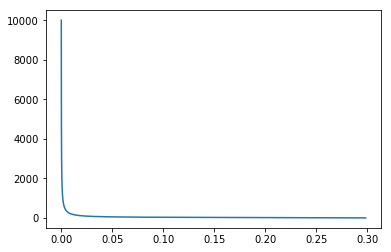

In [4]:
plt.plot(listE_total, listCount)
plt.show